# Analysis of Arsenal's corners so far in the WSL in 2025/26

In [ ]:
import pandas as pd
import mplsoccer
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.patches import Patch

This data was collected by hand, watching games on YouTube. See later cells for a definition of the target location.

In [ ]:
corners = pd.read_csv("data/corners.csv")
corners.head()

,Video link,Game,Ground pass,Group,ID,Minute,Outcome,Side,Swing,Target location
0,https://www.youtube.com/live/ybQDwsrwIfg?si=VT...,Brighton (H),Yes,NaN,COR-1,104,Recycled,Right,NaN,Corner R
1,https://www.youtube.com/live/ybQDwsrwIfg?si=uw...,Brighton (H),Yes,Left front post,COR-2,91,Cleared,Left,Inswinger,A1
2,https://www.youtube.com/live/ybQDwsrwIfg?si=ad...,Brighton (H),No,Right front post,COR-3,79,Woodwork,Right,Inswinger,B5
3,https://www.youtube.com/live/ybQDwsrwIfg?si=4k...,Brighton (H),Yes,Left front post,COR-4,63,Cleared,Left,Inswinger,A1
4,https://www.youtube.com/live/ybQDwsrwIfg?si=Rs...,Brighton (H),Yes,NaN,COR-5,58,Saved,Right,NaN,Corner R


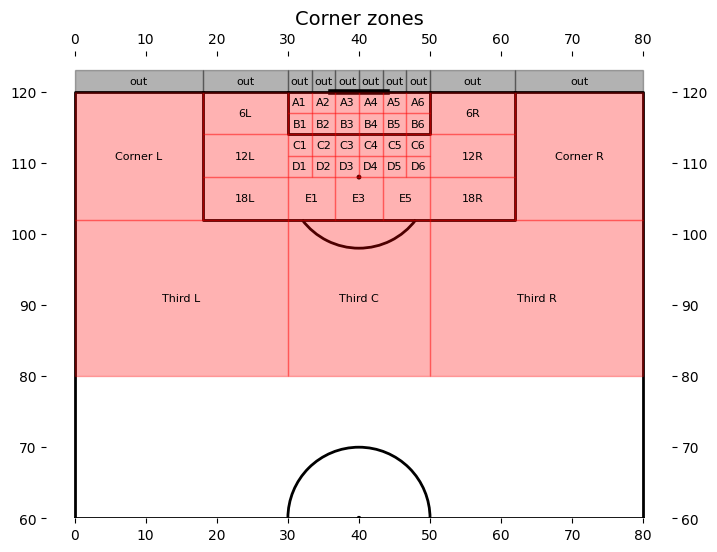

In [ ]:
# Define and plot corner zones
fig, ax = plt.subplots(figsize=(10, 6))
pitch = mplsoccer.VerticalPitch(
    pitch_type="statsbomb",
    pitch_color="white",
    line_color="black",
    half=True,
    label=True,
    tick=True,
)
pitch.draw(ax=ax)

corner_zones = pd.DataFrame(
    [
        {"zone": "Corner L", "x0": 0, "x1": 18, "y0": 102, "y1": 120},
        {"zone": "Corner R", "x0": 62, "x1": 80, "y0": 102, "y1": 120},
        {"zone": "6L", "x0": 18, "x1": 30, "y0": 114, "y1": 120},
        {"zone": "12L", "x0": 18, "x1": 30, "y0": 108, "y1": 114},
        {"zone": "18L", "x0": 18, "x1": 30, "y0": 102, "y1": 108},
        {"zone": "6R", "x0": 50, "x1": 62, "y0": 114, "y1": 120},
        {"zone": "12R", "x0": 50, "x1": 62, "y0": 108, "y1": 114},
        {"zone": "18R", "x0": 50, "x1": 62, "y0": 102, "y1": 108},
        {"zone": "A1", "x0": 30, "x1": 33.33, "y0": 117, "y1": 120},
        {"zone": "A2", "x0": 33.33, "x1": 36.66, "y0": 117, "y1": 120},
        {"zone": "A3", "x0": 36.66, "x1": 40, "y0": 117, "y1": 120},
        {"zone": "A4", "x0": 40, "x1": 43.33, "y0": 117, "y1": 120},
        {"zone": "A5", "x0": 43.33, "x1": 46.66, "y0": 117, "y1": 120},
        {"zone": "A6", "x0": 46.66, "x1": 50, "y0": 117, "y1": 120},
        {"zone": "B1", "x0": 30, "x1": 33.33, "y0": 114, "y1": 117},
        {"zone": "B2", "x0": 33.33, "x1": 36.66, "y0": 114, "y1": 117},
        {"zone": "B3", "x0": 36.66, "x1": 40, "y0": 114, "y1": 117},
        {"zone": "B4", "x0": 40, "x1": 43.33, "y0": 114, "y1": 117},
        {"zone": "B5", "x0": 43.33, "x1": 46.66, "y0": 114, "y1": 117},
        {"zone": "B6", "x0": 46.66, "x1": 50, "y0": 114, "y1": 117},
        {"zone": "C1", "x0": 30, "x1": 33.33, "y0": 111, "y1": 114},
        {"zone": "C2", "x0": 33.33, "x1": 36.66, "y0": 111, "y1": 114},
        {"zone": "C3", "x0": 36.66, "x1": 40, "y0": 111, "y1": 114},
        {"zone": "C4", "x0": 40, "x1": 43.33, "y0": 111, "y1": 114},
        {"zone": "C5", "x0": 43.33, "x1": 46.66, "y0": 111, "y1": 114},
        {"zone": "C6", "x0": 46.66, "x1": 50, "y0": 111, "y1": 114},
        {"zone": "D1", "x0": 30, "x1": 33.33, "y0": 108, "y1": 111},
        {"zone": "D2", "x0": 33.33, "x1": 36.66, "y0": 108, "y1": 111},
        {"zone": "D3", "x0": 36.66, "x1": 40, "y0": 108, "y1": 111},
        {"zone": "D4", "x0": 40, "x1": 43.33, "y0": 108, "y1": 111},
        {"zone": "D5", "x0": 43.33, "x1": 46.66, "y0": 108, "y1": 111},
        {"zone": "D6", "x0": 46.66, "x1": 50, "y0": 108, "y1": 111},
        {"zone": "E1", "x0": 30, "x1": 36.66, "y0": 102, "y1": 108},
        {"zone": "E3", "x0": 36.66, "x1": 43.33, "y0": 102, "y1": 108},
        {"zone": "E5", "x0": 43.33, "x1": 50, "y0": 102, "y1": 108},
        {"zone": "Third L", "x0": 0, "x1": 30, "y0": 80, "y1": 102},
        {"zone": "Third C", "x0": 30, "x1": 50, "y0": 80, "y1": 102},
        {"zone": "Third R", "x0": 50, "x1": 80, "y0": 80, "y1": 102},
    ]
)

out_corner_zones = pd.DataFrame(
    [
        {"zone": "Corner L out", "x0": 0, "x1": 18, "y0": 120, "y1": 123},
        {"zone": "Corner R out", "x0": 62, "x1": 80, "y0": 120, "y1": 123},
        {"zone": "6L out", "x0": 18, "x1": 30, "y0": 120, "y1": 123},
        {"zone": "6R out", "x0": 50, "x1": 62, "y0": 120, "y1": 123},
        {"zone": "A1 out", "x0": 30, "x1": 33.33, "y0": 120, "y1": 123},
        {"zone": "A2 out", "x0": 33.33, "x1": 36.66, "y0": 120, "y1": 123},
        {"zone": "A3 out", "x0": 36.66, "x1": 40, "y0": 120, "y1": 123},
        {"zone": "A4 out", "x0": 40, "x1": 43.33, "y0": 120, "y1": 123},
        {"zone": "A5 out", "x0": 43.33, "x1": 46.66, "y0": 120, "y1": 123},
        {"zone": "A6 out", "x0": 46.66, "x1": 50, "y0": 120, "y1": 123},
    ]
)

all_zones = pd.concat([corner_zones, out_corner_zones], ignore_index=True)

for _, row in corner_zones.iterrows():
    ax.add_patch(
        plt.Rectangle(
            (row["x0"], row["y0"]),
            row["x1"] - row["x0"],
            row["y1"] - row["y0"],
            color="red",
            alpha=0.3,
        )
    )
    ax.text(
        (row["x0"] + row["x1"]) / 2,
        (row["y0"] + row["y1"]) / 2,
        row["zone"],
        color="black",
        ha="center",
        va="center",
        fontsize=8,
    )

for _, row in out_corner_zones.iterrows():
    ax.add_patch(
        plt.Rectangle(
            (row["x0"], row["y0"]),
            row["x1"] - row["x0"],
            row["y1"] - row["y0"],
            color="black",
            alpha=0.3,
        )
    )
    ax.text(
        (row["x0"] + row["x1"]) / 2,
        (row["y0"] + row["y1"]) / 2,
        "out",
        color="black",
        ha="center",
        va="center",
        fontsize=8,
    )

ax.set_ylim(60, 125)
ax.set_title("Corner zones", fontsize=14)
plt.show()

In [ ]:
def plot_corner_heatmap(
    corners_by_target_location,
    col_name,
    metric_col_name,
    all_zones,
    title="",
    ax=None,
    label=True,
):
    """
    Plots the corner target locations on a soccer pitch.

    Parameters:
    - corners_by_target_location: DataFrame with columns 'Target location' and 'Count'.
    - all_zones: DataFrame with columns 'zone', 'x0', 'x1', 'y0', 'y1'.
    """
    # Create a mapping from zone names to counts
    zone_counts = dict(
        zip(
            corners_by_target_location[col_name],
            corners_by_target_location[metric_col_name],
        )
    )

    valid_zones = all_zones["zone"].values

    # Get counts for each valid zone (0 if not present)
    counts = [zone_counts.get(zone, 0) for zone in valid_zones]

    # Create figure
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
    else:
        fig = ax.figure

    pitch = mplsoccer.VerticalPitch(
        pitch_type="statsbomb",
        pitch_color="white",
        line_color="black",
        half=True,
        line_zorder=2,
    )
    pitch.draw(ax=ax)

    # Create colormap and normalizer (using 'hot' or 'plasma' which work well on black)
    cmap = plt.cm.Reds
    norm = Normalize(vmin=0, vmax=max(counts) if counts else 1)

    # Plot each zone with color based on count
    for idx, row in all_zones.iterrows():
        zone_name = row["zone"]
        count = zone_counts.get(zone_name, 0)

        # Get color from colormap
        color = cmap(norm(count))

        ax.add_patch(
            plt.Rectangle(
                (row["x0"], row["y0"]),
                row["x1"] - row["x0"],
                row["y1"] - row["y0"],
                color=color,
                alpha=0.8,
                edgecolor="white",
                linewidth=0.5,
            )
        )

        if label:
            # Add zone label and count
            ax.text(
                (row["x0"] + row["x1"]) / 2,
                (row["y0"] + row["y1"]) / 2,
                f"{count}",
                color="black",
                ha="center",
                va="center",
                fontsize=10,
            )

    ax.set_ylim(80, 125)
    ax.set_title(title, color="black", pad=20)

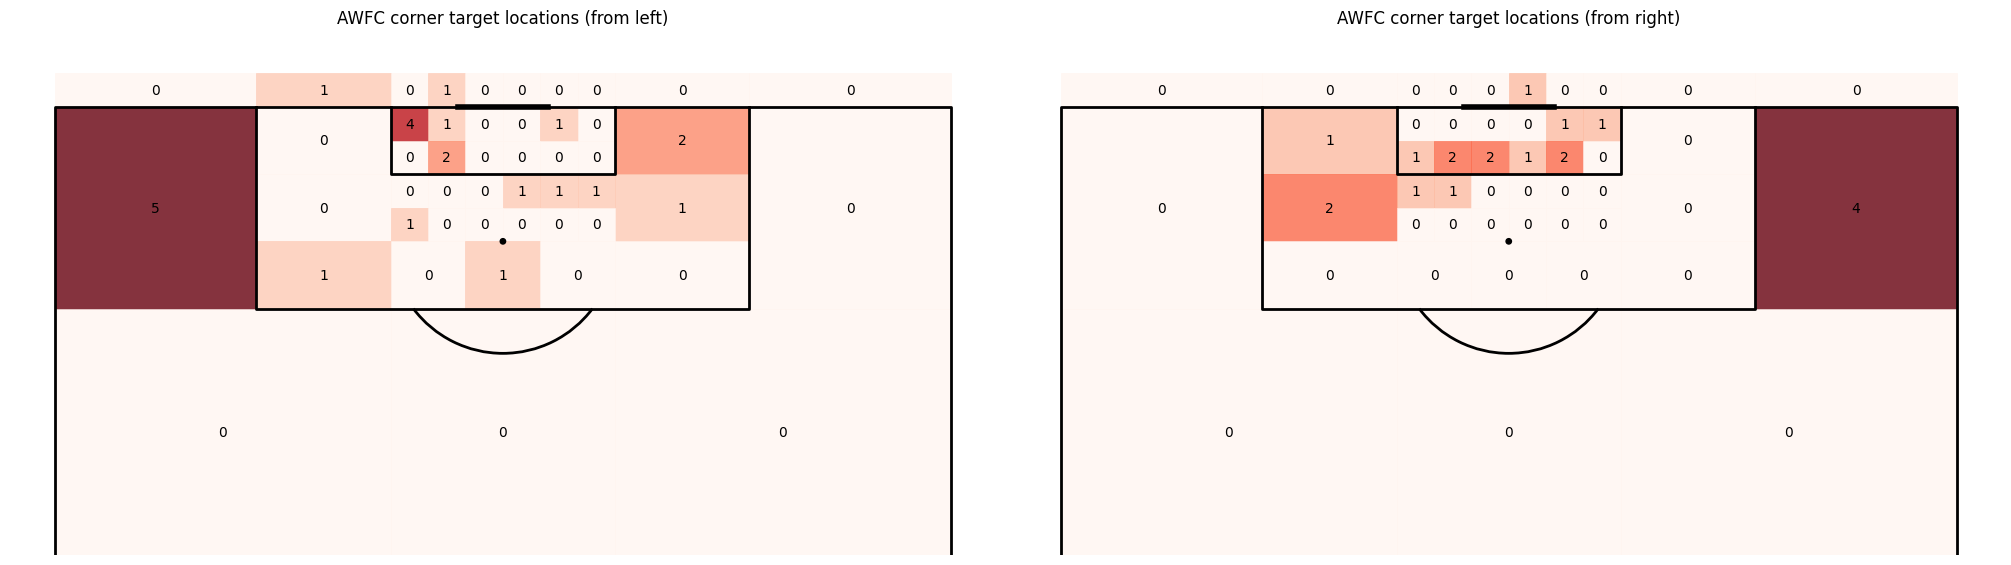

In [ ]:
left_corners = corners[corners["Side"] == "Left"]
right_corners = corners[corners["Side"] == "Right"]

fig, ax = plt.subplots(ncols=2, figsize=(20, 8), constrained_layout=True)

plot_corner_heatmap(
    left_corners.groupby("Target location")["Target location"]
    .count()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=False),
    col_name="Target location",
    metric_col_name="Count",
    all_zones=all_zones,
    title="AWFC corner target locations (from left)",
    ax=ax[0],
)
plot_corner_heatmap(
    right_corners.groupby("Target location")["Target location"]
    .count()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=False),
    col_name="Target location",
    metric_col_name="Count",
    all_zones=all_zones,
    title="AWFC corner target locations (from right)",
    ax=ax[1],
)

# Player movement and roles

In [ ]:
players = pd.read_csv("data/players.csv")
players.head()

,Name,Corner ID,Corner group,Corners,End location,ID,Marking,Player name,Role,Start location
0,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,A1,PLYR-1,Gained separation,Caitlin Foord,Pass target,B3
1,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,A3,PLYR-2,Gained separation,Alessia Russo,Shot target,C4
2,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,B3,PLYR-3,Gained separation,Katie Reid,Shot target,D3
3,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,C2,PLYR-4,Gained separation,Steph Catley,Shot target,E3
4,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,D6,PLYR-5,Goal marked,Frida Maanum,Decoy,E3


In [ ]:
def get_start_and_end_counts(players, corner_group):
    corner_group_players = players[players["Corner group"] == corner_group]
    start_counts = (
        corner_group_players.groupby("Start location")["Start location"]
        .count()
        .reset_index(name="Count")
        .sort_values(by="Count", ascending=False)
    )
    end_counts = (
        corner_group_players.groupby("End location")["End location"]
        .count()
        .reset_index(name="Count")
        .sort_values(by="Count", ascending=False)
    )
    return start_counts, end_counts

def plot_start_end_heatmaps(corner_group, all_zones):
    start_counts, end_counts = get_start_and_end_counts(players, corner_group)

    fig, ax = plt.subplots(ncols=2, figsize=(8, 4), constrained_layout=True)

    plot_corner_heatmap(
        start_counts,
        col_name="Start location",
        metric_col_name="Count",
        all_zones=all_zones,
        title=f"{corner_group} - Player start locations",
        ax=ax[0],
        label=False,
    )
    plot_corner_heatmap(
        end_counts,
        col_name="End location",
        metric_col_name="Count",
        all_zones=all_zones,
        title=f"{corner_group} - Player end locations",
        ax=ax[1],
        label=False,
    )
    
    return fig

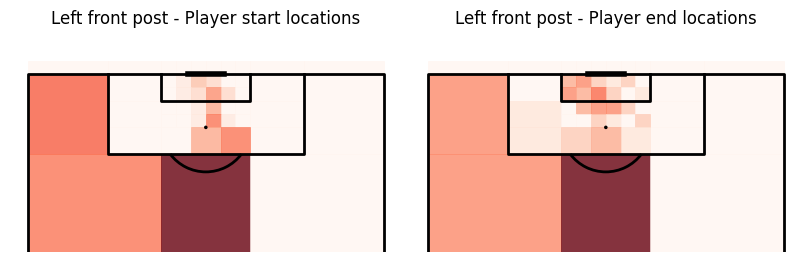

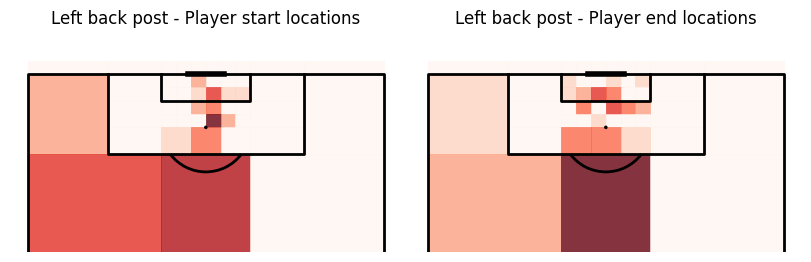

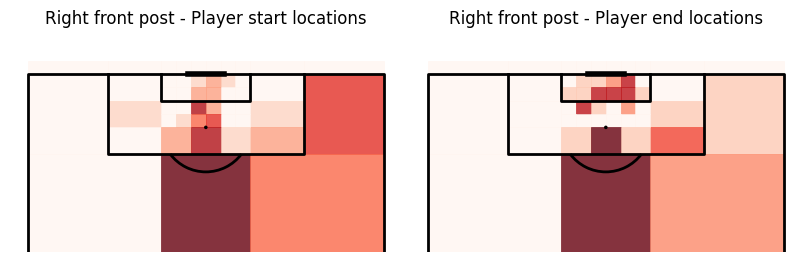

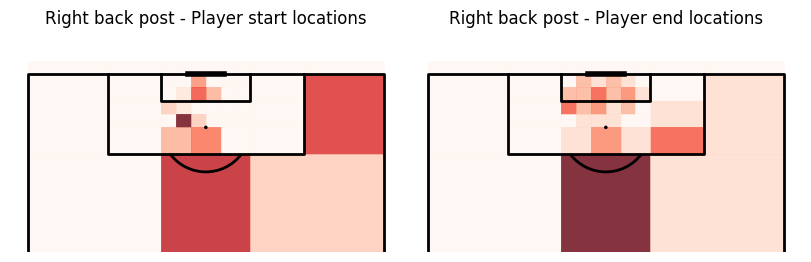

In [ ]:
for group in players["Corner group"].unique():
    fig = plot_start_end_heatmaps(group, all_zones)
    plt.show()

In [ ]:

# Plot start and end locations by role

def plot_start_end_by_role(corner_group_players, all_zones):
    roles = corner_group_players["Role"].unique()
    fig, ax = plt.subplots(
        nrows=2, ncols=len(roles), figsize=(4 * len(roles), 8), constrained_layout=True
    )

    for i, role in enumerate(roles):
        role_players = corner_group_players[corner_group_players["Role"] == role]

        role_start_counts = (
            role_players.groupby("Start location")["Start location"]
            .count()
            .reset_index(name="Count")
            .sort_values(by="Count", ascending=False)
        )
        role_end_counts = (
            role_players.groupby("End location")["End location"]
            .count()
            .reset_index(name="Count")
            .sort_values(by="Count", ascending=False)
        )

        plot_corner_heatmap(
            role_start_counts,
            col_name="Start location",
            metric_col_name="Count",
            all_zones=all_zones,
            title=f"{role} start locations",
            ax=ax[0, i],
            label=False,
        )

        plot_corner_heatmap(
            role_end_counts,
            col_name="End location",
            metric_col_name="Count",
            all_zones=all_zones,
            title=f"{role} end locations",
            ax=ax[1, i],
            label=False,
        )
        
    return fig

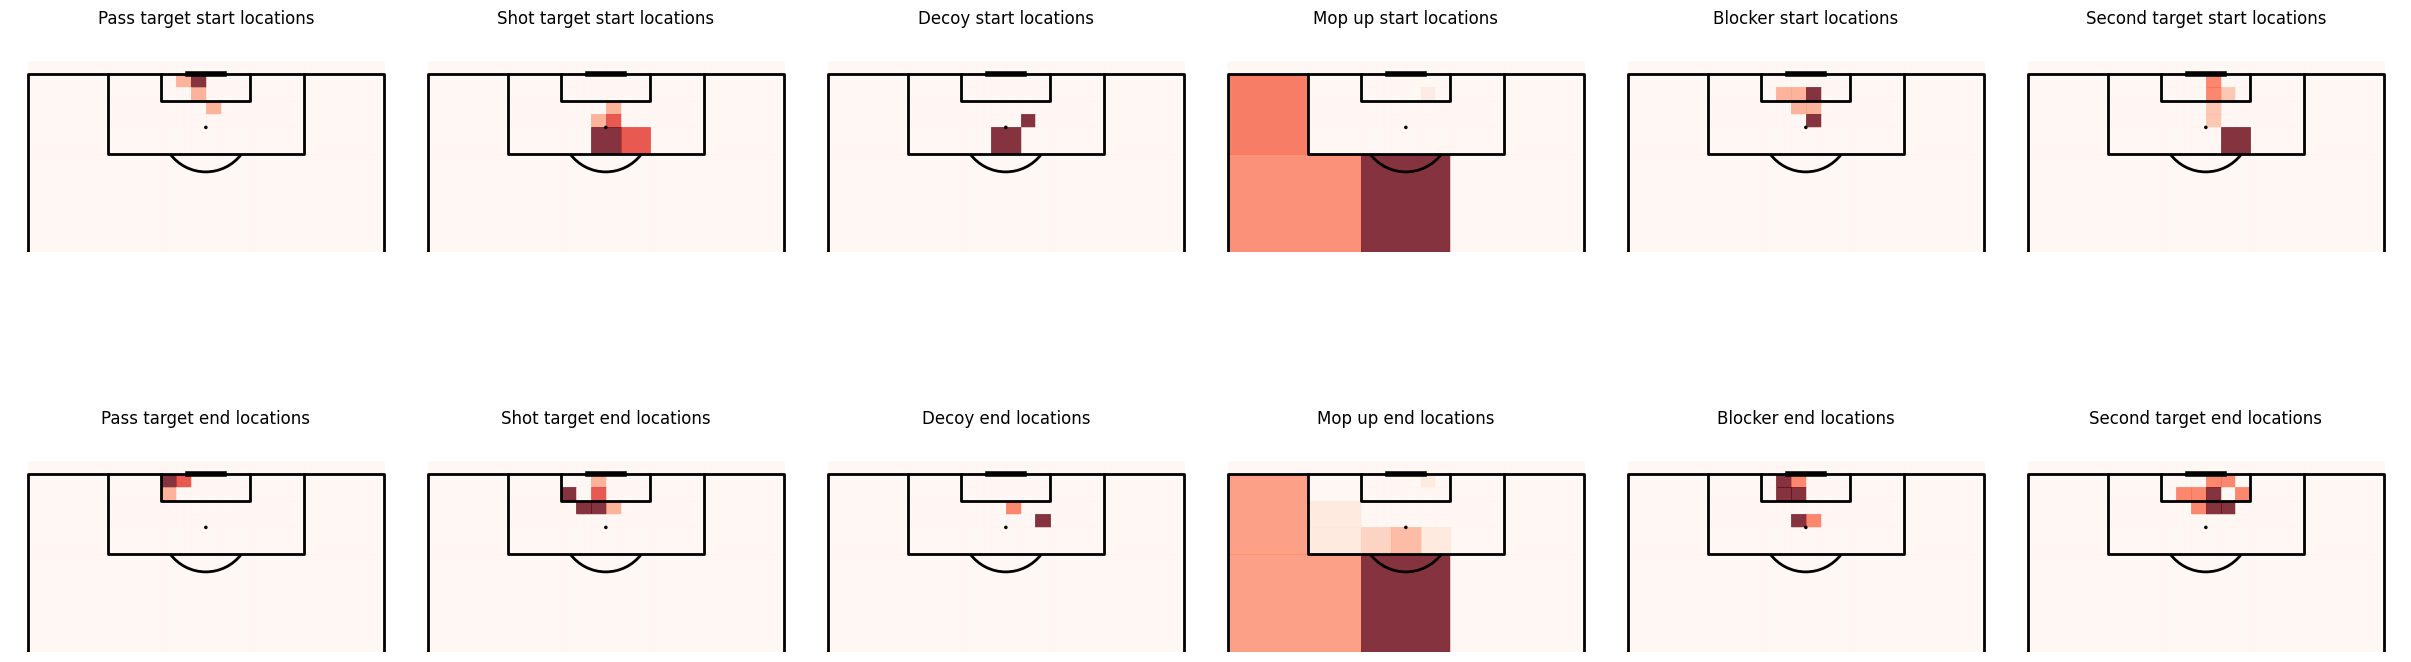

In [ ]:

fig = plot_start_end_by_role(
    players[players["Corner group"] == "Left front post"], all_zones
)
plt.show()

# Clustering corners using player movement data

How do we know the four groups are correct? Is there a difference between left and right plays or are they just mirrored? Are there more subtle groupings between plays that we can infer from the data (instead of watching video for every corner)? We will try to use clustering to achieve this.

In [ ]:
# Reduce dimensions of data to only the columns we need
player_paths = players[
    [
        "Start location",
        "End location",
        "Role",
        "Corner ID"
    ]
].copy()

player_paths = pd.merge(
    left=player_paths,
    right=corners[["Side", "ID"]],
    left_on="Corner ID",
    right_on="ID",
    how="left",
)
player_paths = player_paths.drop(columns=["ID"])

We will assume that the "mop up" role doesn't significantly affect the clustering. We will also assume the "pass target" role is functionally very similar to the "shot target" role, so we will replace it. 

In [ ]:
player_paths = player_paths[player_paths["Role"] != "Mop up"]
player_paths["Role"] = player_paths["Role"].replace(
    {"Pass target": "Shot target"}
)
player_paths = player_paths.groupby("Corner ID").filter(lambda x: len(x) == 5)
player_paths

,Role,Corner ID,start_x,start_y,end_x,end_y,player_num
0,Shot target,COR-11,38.330,115.5,31.665,118.5,1
1,Shot target,COR-11,41.665,112.5,38.330,118.5,2
2,Shot target,COR-11,38.330,109.5,38.330,115.5,3
3,Shot target,COR-11,39.995,105.0,34.995,112.5,4
4,Secondary target,COR-11,39.995,105.0,48.330,109.5,5
...,...,...,...,...,...,...,...
210,Secondary target,COR-43,38.335,115.5,38.335,112.5,1
211,Blocker,COR-43,41.670,115.5,41.670,112.5,2
212,Secondary target,COR-43,40.005,105.0,35.005,115.5,3
213,Shot target,COR-43,45.005,109.5,41.670,109.5,4


Since the locations are defined as zones, we need to convert them to XY coordinates to preserve the spatial meaning.

In [ ]:
player_paths["start_x"] = player_paths["Start location"].map(
    dict(zip(all_zones["zone"], (all_zones["x0"] + all_zones["x1"]) / 2))
)
player_paths["start_y"] = player_paths["Start location"].map(
    dict(zip(all_zones["zone"], (all_zones["y0"] + all_zones["y1"]) / 2))
)
player_paths["end_x"] = player_paths["End location"].map(
    dict(zip(all_zones["zone"], (all_zones["x0"] + all_zones["x1"]) / 2))
)
player_paths["end_y"] = player_paths["End location"].map(
    dict(zip(all_zones["zone"], (all_zones["y0"] + all_zones["y1"]) / 2))
)

KeyError: 'Start location'

We will plot them just to be sure

In [ ]:
role_colours = {
    "Shot target": "red",
    "Second target": "pink",
    "Blocker": "blue",
}

def plot_corner_paths(corner_paths, title="", ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    pitch = mplsoccer.VerticalPitch(
        pitch_type="statsbomb",
        pitch_color="white",
        line_color="black",
        half=True,
        tick=True,
        label=True,
    )
    pitch.draw(ax=ax)

    for _, row in corner_paths.iterrows():
        ax.arrow(
            row["start_x"],
            row["start_y"],
            row["end_x"] - row["start_x"],
            row["end_y"] - row["start_y"],
            head_width=1,
            head_length=1,
            length_includes_head=True,
            color=role_colours.get(row["Role"], "blue"),
            alpha=0.7,
        )
        
    ax.set_title(title, fontsize=14)
    ax.legend(
        handles=[
            Patch(color=color, label=role)
            for role, color in role_colours.items()
        ],
        loc="lower right",
    )


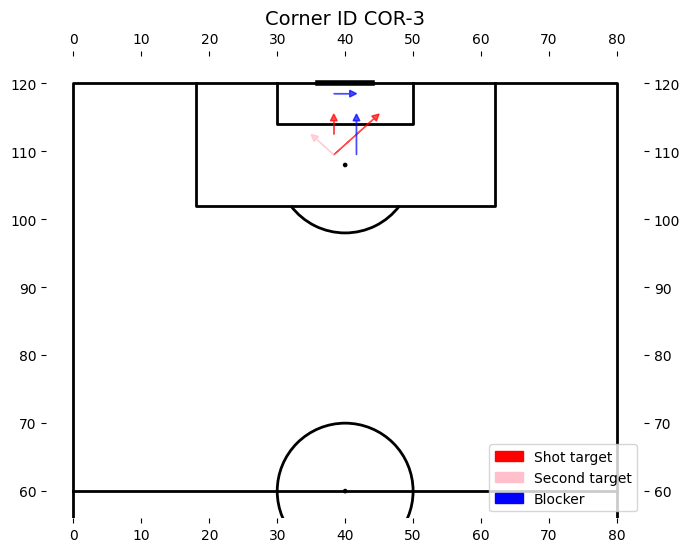

In [ ]:
# Plot the player paths for the same sample corner to verify mirroring is correct
sample_corner_id = player_paths[player_paths["Side"] == "Right"]["Corner ID"].iloc[0]
sample_paths = player_paths[player_paths["Corner ID"] == sample_corner_id]
fig = plot_corner_paths(
    sample_paths, title=f"Corner ID {sample_corner_id}"
)

We assume the corners can be mirrored, so we convert all right sided corners to left sided coordinates. The line of symmetry is x=40.

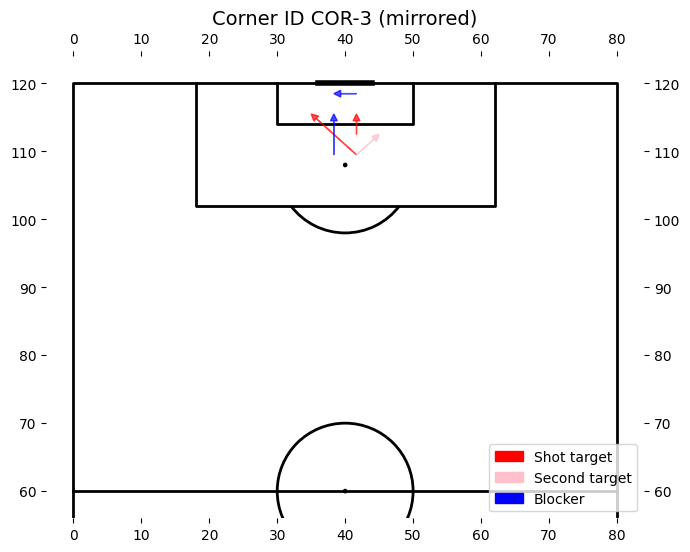

In [ ]:
player_paths.loc[player_paths["Side"] == "Right", "start_x"] = 80 - player_paths.loc[
    player_paths["Side"] == "Right", "start_x"
]
player_paths.loc[player_paths["Side"] == "Right", "end_x"] = 80 - player_paths.loc[
    player_paths["Side"] == "Right", "end_x"
]

# Plot the player paths for the same sample corner to verify mirroring is correct
sample_corner_id = player_paths[player_paths["Side"] == "Right"]["Corner ID"].iloc[0]
sample_paths = player_paths[player_paths["Corner ID"] == sample_corner_id]
fig = plot_corner_paths(
    sample_paths, title=f"Corner ID {sample_corner_id} (mirrored)"
)

In [ ]:
player_paths = player_paths.drop(columns=["Side", "Start location", "End location"])

In [ ]:
player_paths

,Role,Corner ID,start_x,start_y,end_x,end_y
0,Shot target,COR-11,38.330,115.5,31.665,118.5
1,Shot target,COR-11,41.665,112.5,38.330,118.5
2,Shot target,COR-11,38.330,109.5,38.330,115.5
3,Shot target,COR-11,39.995,105.0,34.995,112.5
4,Secondary target,COR-11,39.995,105.0,48.330,109.5
...,...,...,...,...,...,...
210,Secondary target,COR-43,38.335,115.5,38.335,112.5
211,Blocker,COR-43,41.670,115.5,41.670,112.5
212,Secondary target,COR-43,40.005,105.0,35.005,115.5
213,Shot target,COR-43,45.005,109.5,41.670,109.5


We need to convert into a corner-oriented table, i.e. one row per corner. We will end up with a wide table where there will be a set of columns for each player involved. 

In [ ]:
player_paths["player_num"] = player_paths.groupby("Corner ID").cumcount() + 1

corners_with_paths = player_paths.pivot(
    index="Corner ID",
    columns="player_num",
    values=["start_x", "start_y", "end_x", "end_y", "Role"],
)

In [ ]:
corners_with_paths

start_x                                 start_y                \
player_num       1       2       3       4       5       1      2      3   
Corner ID                                                                  
COR-11       38.33  41.665   38.33  39.995  39.995   115.5  112.5  109.5   
COR-13      41.665  41.665  41.665  41.665   38.33   109.5  109.5  109.5   
COR-14       38.33  41.665  41.665  41.665  41.665   112.5  112.5  112.5   
COR-15       41.67   41.67  38.335   41.67  38.335   112.5  112.5  112.5   
COR-19       41.67  38.335  48.335  48.335   41.67   115.5  115.5  112.5   
COR-2       34.995   38.33  41.665  41.665  44.995   118.5  112.5  109.5   
COR-20      40.005  40.005  40.005   41.67  38.335   105.0  105.0  105.0   
COR-23      38.335   41.67   46.67   46.67  40.005   118.5  112.5  105.0   
COR-24      40.005  40.005  40.005  38.335   41.67   105.0  105.0  105.0   
COR-25      41.665  44.995     NaN     NaN     NaN   118.5  115.5    NaN   
COR-3        41.67   41.67  38.335   41.67   41.67   109.5  109.5  109.5   
COR-31       41.67   41.67  45.005  45.005  45.005   118.5  118.5  109.5   
COR-33      45.005  45.005  45.005   41.67   41.67   109.5  109.5  109.5   
COR-34      45.005  45.005  45.005   41.67  45.005   109.5  109.5  109.5   
COR-35      39.995  46.665  46.665  41.665  41.665   105.0  105.0  105.0   
COR-36      34.995  41.665     NaN     NaN     NaN   115.5  115.5    NaN   
COR-37      35.005  38.335   41.67  45.005    56.0   118.5  112.5  109.5   
COR-4        38.33  41.665  41.665  46.665  46.665   118.5  115.5  109.5   
COR-40      44.995   48.33     NaN     NaN     NaN   115.5  115.5    NaN   
COR-41       41.67  45.005   41.67  40.005   46.67   115.5  112.5  109.5   
COR-43      38.335   41.67  40.005  45.005   46.67   115.5  115.5  105.0   
COR-6       38.335  38.335  38.335  38.335   41.67   109.5  109.5  109.5   
COR-7        38.33   38.33  41.665  41.665  41.665   118.5  115.5  109.5   
COR-8        38.33  41.665  41.665  41.665  41.665   118.5  115.5  112.5   
COR-9        38.33   38.33  41.665  41.665  41.665   118.5  112.5  109.5   

                          ...  end_y                              \
player_num      4      5  ...      1      2      3      4      5   
Corner ID                 ...                                      
COR-11      105.0  105.0  ...  118.5  118.5  115.5  112.5  109.5   
COR-13      115.5  115.5  ...  112.5  112.5  112.5  118.5  115.5   
COR-14      115.5  115.5  ...  112.5  112.5  115.5  115.5  115.5   
COR-15      115.5  115.5  ...  112.5  118.5  118.5  118.5  115.5   
COR-19      112.5  115.5  ...  115.5  112.5  112.5  112.5  118.5   
COR-2       109.5  109.5  ...  118.5  118.5  115.5  109.5  112.5   
COR-20      115.5  115.5  ...  112.5  112.5  109.5  115.5  118.5   
COR-23      105.0  105.0  ...  118.5  112.5  115.5  112.5  112.5   
COR-24      115.5  112.5  ...  112.5  115.5  115.5  118.5  112.5   
COR-25        NaN    NaN  ...  118.5  115.5  115.5  109.5  115.5   
COR-3       112.5  118.5  ...  115.5  112.5  115.5  115.5  118.5   
COR-31      109.5  109.5  ...  115.5  118.5  115.5  115.5  115.5   
COR-33      118.5  115.5  ...  112.5  115.5  115.5  115.5  118.5   
COR-34      118.5  115.5  ...  112.5  115.5  118.5  118.5  112.5   
COR-35      115.5  118.5  ...  115.5  112.5  112.5  115.5  118.5   
COR-36        NaN    NaN  ...  115.5  115.5  115.5  112.5  112.5   
COR-37      109.5  111.0  ...  118.5  115.5  115.5  115.5  115.5   
COR-4       105.0  105.0  ...  118.5  115.5  109.5  112.5  112.5   
COR-40        NaN    NaN  ...  115.5  118.5  112.5  112.5  112.5   
COR-41      105.0  105.0  ...  115.5  115.5  112.5  115.5  109.5   
COR-43      109.5  105.0  ...  112.5  112.5  115.5  109.5  112.5   
COR-6       118.5  115.5  ...  115.5  115.5  115.5  118.5  115.5   
COR-7       109.5  109.5  ...  118.5  118.5  112.5  112.5  109.5   
COR-8       112.5  112.5  ...  118.5  115.5  115.5  115.5  115.5   
COR-9       109.5  109.5  ...  118.5  115.5  1

In [ ]:
# Flatten the multi-index columns for easier manipulation
corners_flat = corners_with_paths.copy()
corners_flat.columns = ['_'.join(map(str, col)) for col in corners_flat.columns]

# Reconstruct player data for each corner
corners_sorted = []

for corner_id in corners_with_paths.index:
    # Extract all player data for this corner
    players_data = []
    for i in range(1, 6):
        player = {
            'start_x': corners_with_paths.loc[corner_id, ('start_x', i)],
            'start_y': corners_with_paths.loc[corner_id, ('start_y', i)],
            'end_x': corners_with_paths.loc[corner_id, ('end_x', i)],
            'end_y': corners_with_paths.loc[corner_id, ('end_y', i)],
            'Role': corners_with_paths.loc[corner_id, ('Role', i)]
        }
        players_data.append(player)
    
    # Sort players by role, then start_x, then start_y
    players_data_sorted = sorted(
        players_data, 
        key=lambda x: (x['Role'], x['start_x'], x['start_y'])
    )
    
    # Flatten sorted data into a single row
    row = {'Corner ID': corner_id}
    for i, player in enumerate(players_data_sorted, 1):
        row[f'start_x_{i}'] = player['start_x']
        row[f'start_y_{i}'] = player['start_y']
        row[f'end_x_{i}'] = player['end_x']
        row[f'end_y_{i}'] = player['end_y']
        row[f'Role_{i}'] = player['Role']
    
    corners_sorted.append(row)

corners_normalised = pd.DataFrame(corners_sorted).set_index('Corner ID')
corners_normalised = corners_normalised.dropna()
corners_normalised

,start_x_1,start_y_1,end_x_1,end_y_1,Role_1,start_x_2,start_y_2,end_x_2,end_y_2,Role_2,...,start_x_4,start_y_4,end_x_4,end_y_4,Role_4,start_x_5,start_y_5,end_x_5,end_y_5,Role_5
Corner ID,,,,,,,,,,,,,,,,,,,,,
COR-11,39.995,105.0,48.330,109.5,Secondary target,38.330,109.5,38.330,115.5,Shot target,...,39.995,105.0,34.995,112.5,Shot target,41.665,112.5,38.330,118.5,Shot target
COR-13,41.665,109.5,48.330,112.5,Blocker,41.665,109.5,44.995,112.5,Blocker,...,41.665,109.5,44.995,112.5,Shot target,41.665,115.5,41.665,118.5,Shot target
COR-14,41.665,115.5,41.665,115.5,Blocker,38.330,112.5,34.995,112.5,Secondary target,...,41.665,112.5,41.665,115.5,Shot target,41.665,115.5,38.330,115.5,Shot target
COR-15,41.670,112.5,45.005,118.5,Blocker,41.670,115.5,41.670,118.5,Blocker,...,38.335,112.5,38.335,118.5,Shot target,41.670,112.5,41.670,112.5,Shot target
COR-19,41.670,115.5,45.005,118.5,Blocker,48.335,112.5,45.005,112.5,Blocker,...,38.335,115.5,35.005,112.5,Secondary target,48.335,112.5,48.335,112.5,Shot target
COR-2,38.330,112.5,34.995,118.5,Blocker,41.665,109.5,38.330,109.5,Blocker,...,34.995,118.5,34.995,118.5,Shot target,41.665,109.5,31.665,115.5,Shot target
COR-20,38.335,115.5,38.335,118.5,Second target,40.005,105.0,35.005,112.5,Secondary target,...,40.005,105.0,48.335,112.5,Shot target,41.670,115.5,41.670,115.5,Shot target
COR-23,46.670,105.0,48.335,115.5,Secondary target,46.670,105.0,45.005,112.5,Secondary target,...,40.005,105.0,35.005,112.5,Shot target,41.670,112.5,35.005,112.5,Shot target
COR-24,41.670,112.5,45.005,112.5,Blocker,40.005,105.0,45.005,112.5,Secondary target,...,40.005,105.0,35.005,115.5,Shot target,40.005,105.0,38.335,115.5,Shot target


We now perform K means clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare data for clustering
# Extract numeric columns (coordinates)
numeric_cols = [col for col in corners_normalised.columns if not col.startswith('Role_')]
X_numeric = corners_normalised[numeric_cols].values

# One-hot encode the Role columns
role_cols = [col for col in corners_normalised.columns if col.startswith('Role_')]
role_dummies = pd.get_dummies(corners_normalised[role_cols], prefix_sep='_')

# Combine numeric and one-hot encoded features
X_combined = np.hstack([X_numeric, role_dummies.values])

# Standardize features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# Fit K-means with chosen number of clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10)
corners_normalised['Cluster'] = kmeans.fit_predict(X_scaled)



In [ ]:
# Show cluster centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame for better visualization
centroid_features = []
feature_names = (
    [f'{col}' for col in numeric_cols] + 
    list(role_dummies.columns)
)

for cluster_id, centroid in enumerate(centroids):
    # Inverse transform to get back to original scale for numeric features
    centroid_original = scaler.inverse_transform(centroid.reshape(1, -1))[0]
    
    centroid_dict = {'Cluster': cluster_id}
    for i, feature_name in enumerate(feature_names):
        centroid_dict[feature_name] = centroid_original[i]
    
    centroid_features.append(centroid_dict)

centroids_df = pd.DataFrame(centroid_features)

We will plot each of the centroids of the clusters to understand what play they represent

In [ ]:
corners_normalised

,start_x_1,start_y_1,end_x_1,end_y_1,Role_1,start_x_2,start_y_2,end_x_2,end_y_2,Role_2,...,start_y_4,end_x_4,end_y_4,Role_4,start_x_5,start_y_5,end_x_5,end_y_5,Role_5,Cluster
Corner ID,,,,,,,,,,,,,,,,,,,,,
COR-11,39.995,105.0,48.330,109.5,Secondary target,38.330,109.5,38.330,115.5,Shot target,...,105.0,34.995,112.5,Shot target,41.665,112.5,38.330,118.5,Shot target,3
COR-13,41.665,109.5,48.330,112.5,Blocker,41.665,109.5,44.995,112.5,Blocker,...,109.5,44.995,112.5,Shot target,41.665,115.5,41.665,118.5,Shot target,2
COR-14,41.665,115.5,41.665,115.5,Blocker,38.330,112.5,34.995,112.5,Secondary target,...,112.5,41.665,115.5,Shot target,41.665,115.5,38.330,115.5,Shot target,2
COR-15,41.670,112.5,45.005,118.5,Blocker,41.670,115.5,41.670,118.5,Blocker,...,112.5,38.335,118.5,Shot target,41.670,112.5,41.670,112.5,Shot target,1
COR-19,41.670,115.5,45.005,118.5,Blocker,48.335,112.5,45.005,112.5,Blocker,...,115.5,35.005,112.5,Secondary target,48.335,112.5,48.335,112.5,Shot target,0
COR-2,38.330,112.5,34.995,118.5,Blocker,41.665,109.5,38.330,109.5,Blocker,...,118.5,34.995,118.5,Shot target,41.665,109.5,31.665,115.5,Shot target,1
COR-20,38.335,115.5,38.335,118.5,Second target,40.005,105.0,35.005,112.5,Secondary target,...,105.0,48.335,112.5,Shot target,41.670,115.5,41.670,115.5,Shot target,2
COR-23,46.670,105.0,48.335,115.5,Secondary target,46.670,105.0,45.005,112.5,Secondary target,...,105.0,35.005,112.5,Shot target,41.670,112.5,35.005,112.5,Shot target,3
COR-24,41.670,112.5,45.005,112.5,Blocker,40.005,105.0,45.005,112.5,Secondary target,...,105.0,35.005,115.5,Shot target,40.005,105.0,38.335,115.5,Shot target,3


In [ ]:
centroids_df

,Cluster,start_x_1,start_y_1,end_x_1,end_y_1,start_x_2,start_y_2,end_x_2,end_y_2,start_x_3,...,Role_2_Second target,Role_2_Secondary target,Role_2_Shot target,Role_3_Second target,Role_3_Secondary target,Role_3_Shot target,Role_4_Second target,Role_4_Secondary target,Role_4_Shot target,Role_5_Shot target
0,3.0,41.668750,116.25,41.668750,117.000,45.002500,114.75,42.502500,114.750,45.002500,...,0.50,0.000000,0.00,1.000,0.000,0.000000e+00,0.25,7.500000e-01,1.110223e-16,1.0
1,1.0,39.583125,111.75,37.915625,115.875,41.667500,114.00,38.750000,115.125,43.666250,...,0.25,0.000000,0.00,0.875,0.125,0.000000e+00,0.00,2.775558e-17,1.000000e+00,1.0
2,2.0,41.112500,115.00,42.223333,115.500,40.279167,113.25,38.889167,114.000,41.669167,...,0.00,0.666667,0.00,0.000,1.000,2.775558e-17,0.00,2.775558e-17,1.000000e+00,1.0
3,0.0,41.666250,108.75,45.000000,113.250,41.667500,107.25,41.667500,114.000,38.332500,...,0.00,0.500000,0.25,0.000,0.000,1.000000e+00,0.00,0.000000e+00,1.000000e+00,1.0


3.0
1.0
2.0
0.0


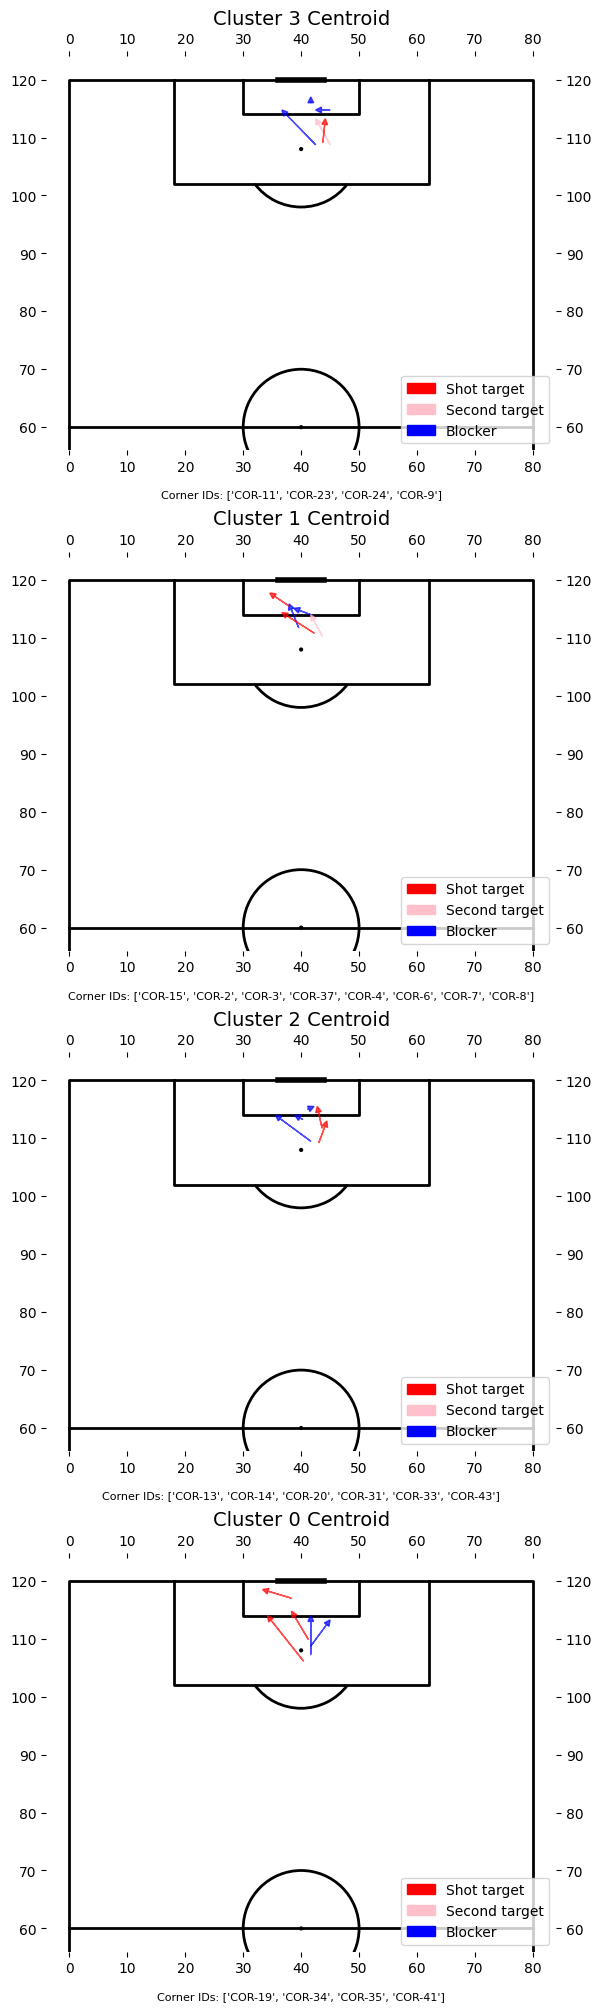

In [ ]:
# Convert centroids back to corner path format

fig, ax = plt.subplots(nrows=n_clusters, ncols=1, figsize=(10, 5*n_clusters), constrained_layout=True)

for idx, centroid in centroids_df.iterrows():
    paths = []
    
    # Get the corner IDs that belong to this cluster
    print(np.round(centroid['Cluster']))
    cluster_corners = corners_normalised[corners_normalised['Cluster'] == centroid['Cluster']]
    

    for i in range(1, 6):
        path = {
            'start_x': centroid[f'start_x_{i}'],
            'start_y': centroid[f'start_y_{i}'],
            'end_x': centroid[f'end_x_{i}'],
            'end_y': centroid[f'end_y_{i}'],
            'Role': None
        }
        
        # Determine role based on one-hot encoded features
        role_prefix = f'Role_{i}_'
        role_cols = [col for col in centroids_df.columns if col.startswith(role_prefix)]
        for role_col in role_cols:
            if centroid[role_col] > 0.5:  # Assuming one-hot encoding
                path['Role'] = role_col.replace(role_prefix, '')
                break
        
        paths.append(path)
        
        
        
    paths_df = pd.DataFrame(paths)
    plot_corner_paths(
        paths_df, title=f"Cluster {int(centroid['Cluster'])} Centroid", ax=ax[idx]
    )
    # List corner IDs in this cluster
    corner_ids = cluster_corners.index.tolist()
    ax[idx].text(0.5, -0.1, f"Corner IDs: {corner_ids}", transform=ax[idx].transAxes, ha="center", va="top", fontsize=8)

# Play quality

We define a custom "play quality" metric to assess the quality of the play being run at the corner. It is the sum across all players involved at the corner of contributing to a shot, assuming the delivery is perfect. 

In [ ]:
# Metric definition: Role x Marking

roles = {
    "Shot target": 1,
    "Pass target": 0.5,
    "Second target": 0.5,
    "Blocker": 0.1,
    "Decoy": 0.1,
    "Mop up": 0.05,
}

marking = {
    "Free": 1,
    "Freed by blocker": 1,
    "Blocking": 1,
    "Gained separation": 0.8,
    "Goal marked": 0.3,
    "Watched zonally": 0.3,
    "Front marked": 0.1,
}

players["Role score"] = players["Role"].map(roles)
players["Marking score"] = players["Marking"].map(marking)
players["Play quality"] = players["Role score"] * players["Marking score"]

players

,Name,Corner ID,Corner group,Corners,End location,ID,Marking,Player name,Role,Start location,Role score,Marking score,Play quality
0,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,A1,PLYR-1,Gained separation,Caitlin Foord,Pass target,B3,0.50,0.8,0.400
1,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,A3,PLYR-2,Gained separation,Alessia Russo,Shot target,C4,1.00,0.8,0.800
2,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,B3,PLYR-3,Gained separation,Katie Reid,Shot target,D3,1.00,0.8,0.800
3,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,C2,PLYR-4,Gained separation,Steph Catley,Shot target,E3,1.00,0.8,0.800
4,NaN,COR-11,Left front post,https://www.youtube.com/live/ybQDwsrwIfg?si=Tf...,D6,PLYR-5,Goal marked,Frida Maanum,Decoy,E3,0.10,0.3,0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,NaN,COR-43,Right back post,https://youtu.be/bnbw1Ozc_2M?si=QClTPpTvFrQ4Gp...,B5,PLYR-213,Goal marked,Steph Catley,Decoy,E3,0.10,0.3,0.030
213,NaN,COR-43,Right back post,https://youtu.be/bnbw1Ozc_2M?si=QClTPpTvFrQ4Gp...,D3,PLYR-214,Goal marked,Alessia Russo,Shot target,D2,1.00,0.3,0.300
214,NaN,COR-43,Right back post,https://youtu.be/bnbw1Ozc_2M?si=QClTPpTvFrQ4Gp...,E3,PLYR-215,Watched zonally,Kim Little,Mop up,Third C,0.05,0.3,0.015
215,NaN,COR-43,Right back post,https://youtu.be/bnbw1Ozc_2M?si=QClTPpTvFrQ4Gp...,C2,PLYR-216,Front marked,Katie Reid,Shot target,E1,1.00,0.1,0.100


Now we have an objective measure of corner quality (excluding the delivery).

In [ ]:
corner_play_quality = (
    players.groupby("Corner ID")["Play quality"]
    .sum()
    .reset_index(name="Play quality")
    .sort_values(by="Play quality", ascending=False)
)
corner_play_quality

,Corner ID,Play quality
0,COR-11,2.945
16,COR-36,2.630
1,COR-12,2.225
10,COR-25,2.195
2,COR-13,1.940
26,COR-9,1.895
22,COR-46,1.835
15,COR-35,1.815
17,COR-37,1.810
24,COR-7,1.680


I would be wary of making any conclusions based on this small sample but one could imagine using this as a opposition scouting tool to identify the most important players at corners, as this metric accounts for their role and their ability to get into a favourable position.

In [ ]:
mean_player_play_quality = (
    players.groupby("Player name")["Play quality"]
    .mean()
    .reset_index(name="Mean play quality")
    .sort_values(by="Mean play quality", ascending=False)
)
mean_player_play_quality

,Player name,Mean play quality
14,Stina Blackstenius,0.432000
0,Alessia Russo,0.419200
16,Unsure,0.400000
13,Steph Catley,0.262609
3,Chloe Kelly,0.260000
10,Lotte Wubben Moy,0.250000
5,Frida Maanum,0.236071
7,Katie Reid,0.232500
2,Caitlin Foord,0.218438
1,Beth Mead,0.099583
